<a href="https://colab.research.google.com/github/Isabelpat/Analisis-de-facturaci-n/blob/main/Analisis_de_facturaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis de facturación:

#Un análisis de facturación es un proceso mediante el cual se revisan,
#estudian y evalúan las facturas emitidas o recibidas por una empresa,
#con el objetivo de obtener información clave sobre su desempeño financiero,
#comportamiento comercial y eficiencia operativa.

Por lo que  en este analisis los puntos que se tomaron en cuneta fueron:

# 1.-Analisis de facturación
# 2.-Ventas por categoria
# 3.-Calificación promedio de la tienda
# 4.-Productos más y menos vendidos
# 5.-Envío promedio por tienda

In [6]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones para graficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

#Datos
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [7]:
# Añadimos una columna a cada tienda para saber su origen
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenamos todo
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
df.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#Preparación de los datos

In [8]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')

In [9]:
# Convertir columna Fecha a datetime
df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'])

# Crear columna de mes y año
df['Mes'] = df['Fecha de Compra'].dt.to_period('M')
df['Año'] = df['Fecha de Compra'].dt.year
df.head()

<ipython-input-9-721cdc02b669>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'])


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda,Mes,Año
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1,2021-01,2021
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1,2022-05,2022
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1,2021-03,2021
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1,2022-05,2022
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1,2020-11,2020


In [10]:
#valor total
df['Valor Final'] = df['Precio'] + df['Costo de envío']

df.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda,Mes,Año,Valor Final
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1,2021-01,2021,171200.0
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1,2022-05,2022,200700.0
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1,2021-03,2021,225500.0
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1,2022-05,2022,798500.0
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1,2020-11,2020,355400.0


In [11]:

# Ingresos totales generales
print("Ingresos totales:", df['Valor Final'].sum())


Ingresos totales: 4638316200.0


#1.-Analisis de facturación

In [ ]:
facturacion = df.groupby('Tienda')['Valor Final'].sum().sort_values(ascending=False).round(2)
print("Facturación total por tienda:")
print(facturacion)


Facturación total por tienda:
Tienda
Tienda 1    1.212258e+09
Tienda 2    1.175829e+09
Tienda 3    1.156536e+09
Tienda 4    1.093693e+09
Name: Valor Final, dtype: float64


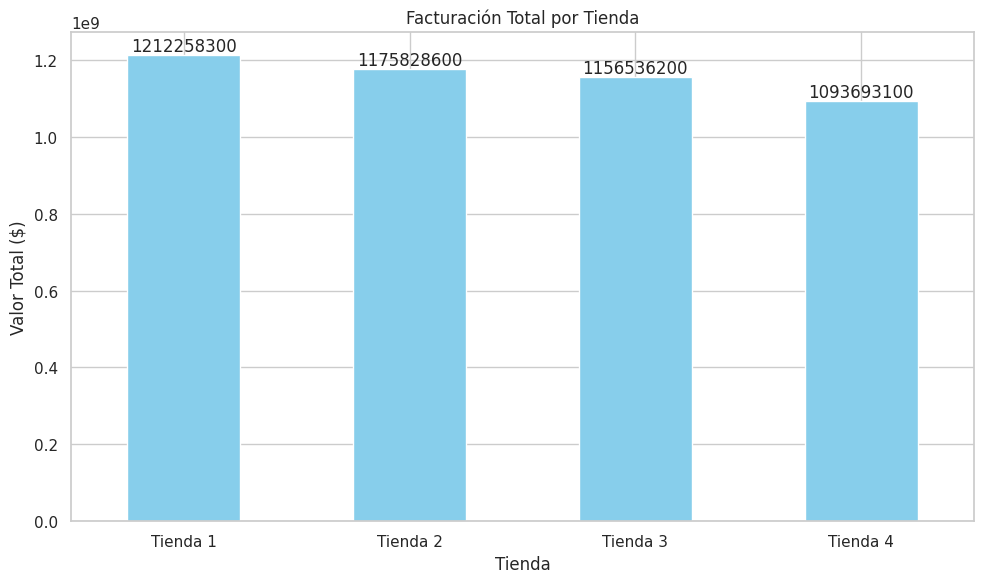

In [12]:
# Gráfico
facturacion = df.groupby('Tienda')['Valor Final'].sum().sort_values(ascending=False)

ax = facturacion.plot(kind='bar', color='skyblue')
plt.title('Facturación Total por Tienda')
plt.ylabel('Valor Total ($)')
plt.xlabel('Tienda')
plt.xticks(rotation=0)

# Etiquetas encima de cada barra
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge')

plt.tight_layout()
plt.show()



# 2. Ventas por categoría

In [13]:
categorias = df['Categoría del Producto'].value_counts().head(10)
print("Categorías más populares:")
print(categorias)



Categorías más populares:
Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: count, dtype: int64


In [ ]:
# por tienda
categorias_tienda = df.groupby(['Tienda', 'Categoría del Producto']).size().sort_values(ascending=False)
print(categorias_tienda.head(10))


Tienda    Categoría del Producto
Tienda 3  Muebles                   499
Tienda 4  Muebles                   480
Tienda 1  Muebles                   465
Tienda 4  Electrónicos              451
Tienda 3  Electrónicos              451
Tienda 1  Electrónicos              448
Tienda 2  Muebles                   442
          Electrónicos              422
Tienda 4  Juguetes                  338
Tienda 1  Juguetes                  324
dtype: int64


<ipython-input-14-4cf5d36778e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=categorias.values, y=categorias.index, palette='viridis')


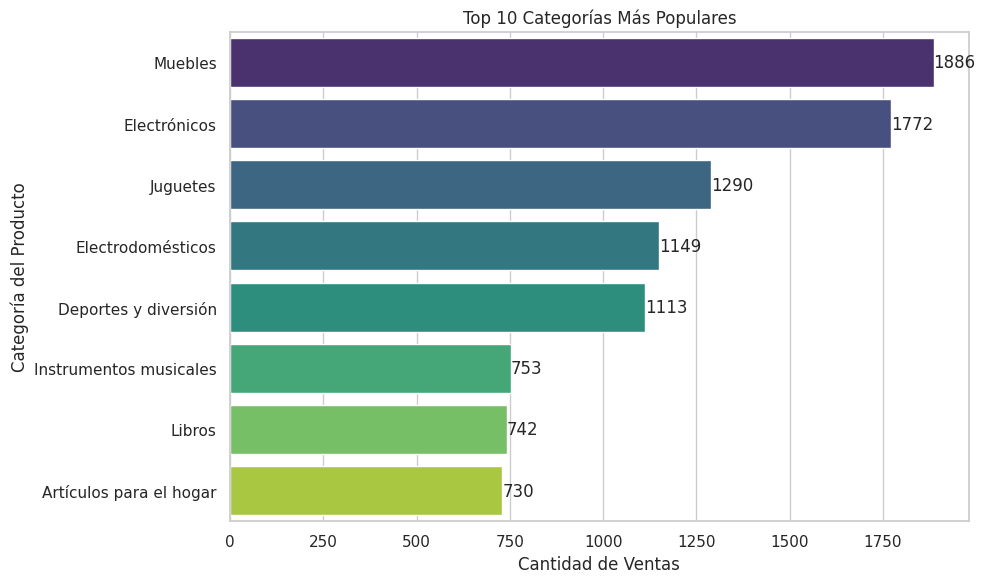

In [14]:
#Grafico
ax= sns.barplot(x=categorias.values, y=categorias.index, palette='viridis')
plt.title('Top 10 Categorías Más Populares')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Categoría del Producto')

# Añadir etiquetas
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()



# 3. Calificación promedio de la tienda

In [16]:
calificaciones = df.groupby('Tienda')['Calificación'].mean().round(2).sort_values(ascending=False)
print("🌟 Calificación promedio por tienda:")
print(calificaciones)


🌟 Calificación promedio por tienda:
Tienda
Tienda 3    4.05
Tienda 2    4.04
Tienda 4    4.00
Tienda 1    3.98
Name: Calificación, dtype: float64


<ipython-input-17-c1001d6a40df>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=calificaciones.values, y=calificaciones.index, palette='coolwarm')


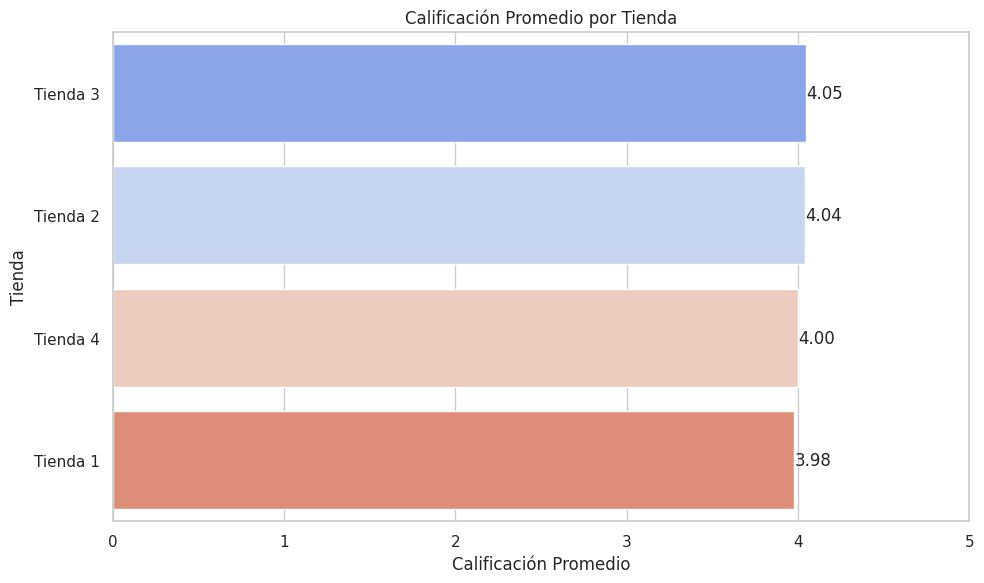

In [17]:
#Grafico
ax= sns.barplot(x=calificaciones.values, y=calificaciones.index, palette='coolwarm')
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Calificación Promedio')
plt.ylabel('Tienda')
plt.xlim(0, 5)

# Añadir etiquetas
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [18]:
productos = df['Producto'].value_counts()
print("🟢 Productos más vendidos:")
print(productos.head(5))
print("\n🔴 Productos menos vendidos:")
print(productos.tail(5))


🟢 Productos más vendidos:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Name: count, dtype: int64

🔴 Productos menos vendidos:
Producto
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64


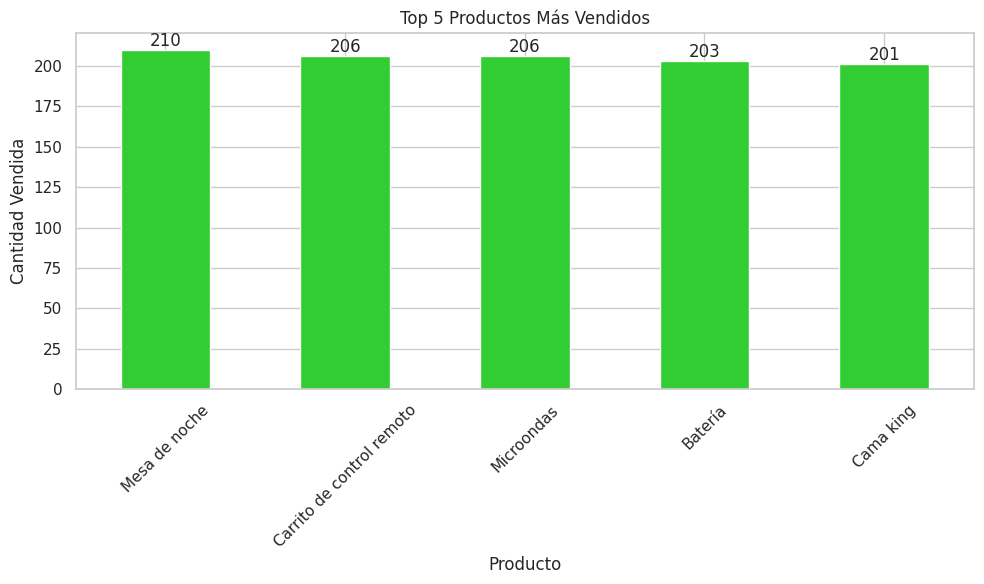

In [19]:
# Más vendidos
ax=productos.head(5).plot(kind='bar', color='limegreen')
plt.title('Top 5 Productos Más Vendidos')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)

# Añadir etiquetas
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

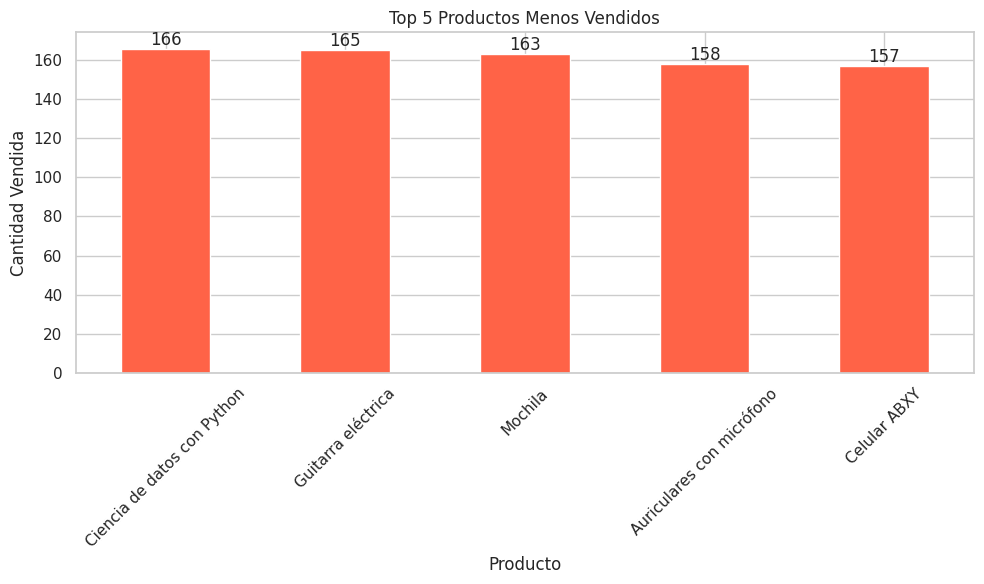

In [ ]:
# Menos vendidos
ax= productos.tail(5).plot(kind='bar', color='tomato')
plt.title('Top 5 Productos Menos Vendidos')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)

# Añadir etiquetas
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [20]:
envio_prom = df.groupby('Tienda')['Costo de envío'].mean().round(2).sort_values()
print("🚚 Costo de envío promedio por tienda:")
print(envio_prom)


🚚 Costo de envío promedio por tienda:
Tienda
Tienda 4    23459.46
Tienda 3    24805.68
Tienda 2    25216.24
Tienda 1    26018.61
Name: Costo de envío, dtype: float64


<ipython-input-21-31b42c5b8ec4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=envio_prom.values, y=envio_prom.index, palette='mako')


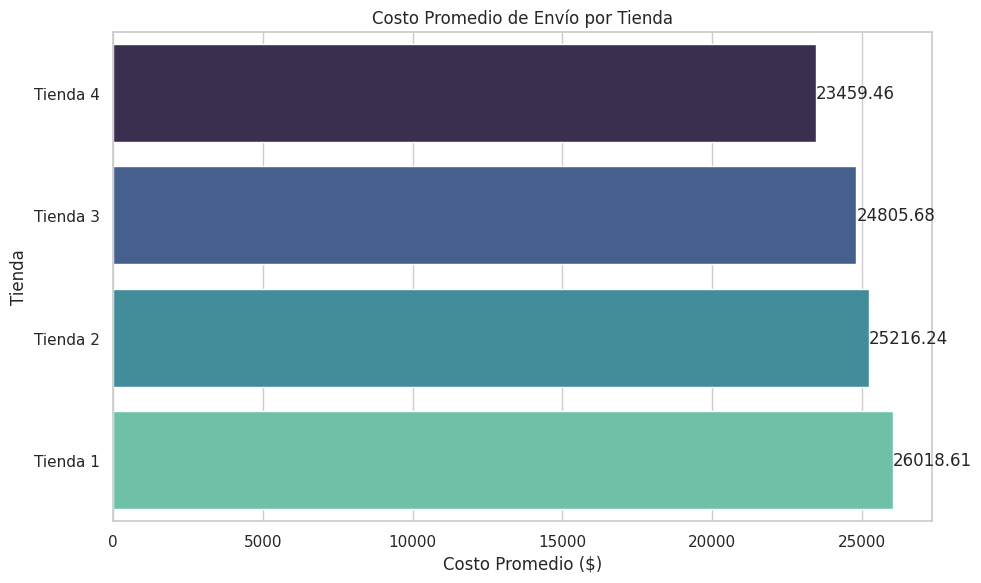

In [21]:
ax= sns.barplot(x=envio_prom.values, y=envio_prom.index, palette='mako')
plt.title('Costo Promedio de Envío por Tienda')
plt.xlabel('Costo Promedio ($)')
plt.ylabel('Tienda')

# Añadir etiquetas
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge')

plt.tight_layout()
plt.show()

#Conclución


In [22]:
resumen = pd.DataFrame({
    'Facturación Total': df.groupby('Tienda')['Valor Final'].sum(),
    'Calificación Promedio': df.groupby('Tienda')['Calificación'].mean(),
    'Costo Envío Promedio': df.groupby('Tienda')['Costo de envío'].mean()
})

# Normalizamos los valores para comparar en la misma escala
resumen_norm = (resumen - resumen.min()) / (resumen.max() - resumen.min())

# Calculamos un score final (puedes ajustar los pesos)
resumen_norm['Score'] = (
    resumen_norm['Facturación Total'] * 0.4 +
    resumen_norm['Calificación Promedio'] * 0.3 +
    (1 - resumen_norm['Costo Envío Promedio']) * 0.3  # menor costo es mejor
)

resumen_ordenado = resumen_norm.sort_values('Score', ascending=False)
print(resumen_ordenado)


          Facturación Total  Calificación Promedio  Costo Envío Promedio  \
Tienda                                                                     
Tienda 3           0.530030               1.000000              0.526043   
Tienda 2           0.692745               0.846154              0.686469   
Tienda 1           1.000000               0.000000              1.000000   
Tienda 4           0.000000               0.266247              0.000000   

             Score  
Tienda              
Tienda 3  0.654199  
Tienda 2  0.625004  
Tienda 1  0.400000  
Tienda 4  0.379874  


#grafico

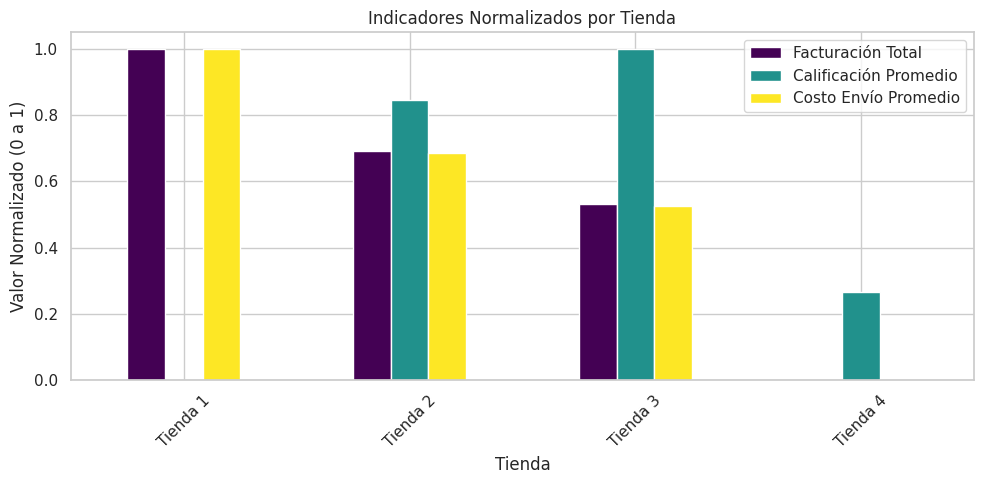

In [23]:
resumen_norm_plot = resumen_norm[['Facturación Total', 'Calificación Promedio', 'Costo Envío Promedio']]

ax= resumen_norm_plot.plot(kind='bar', figsize=(10, 5), colormap='viridis')
plt.title('Indicadores Normalizados por Tienda')
plt.ylabel('Valor Normalizado (0 a 1)')
plt.xlabel('Tienda')
plt.xticks(rotation=45)
plt.legend(loc='upper right')



plt.tight_layout()
plt.show()

<ipython-input-24-a488b1843d38>:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


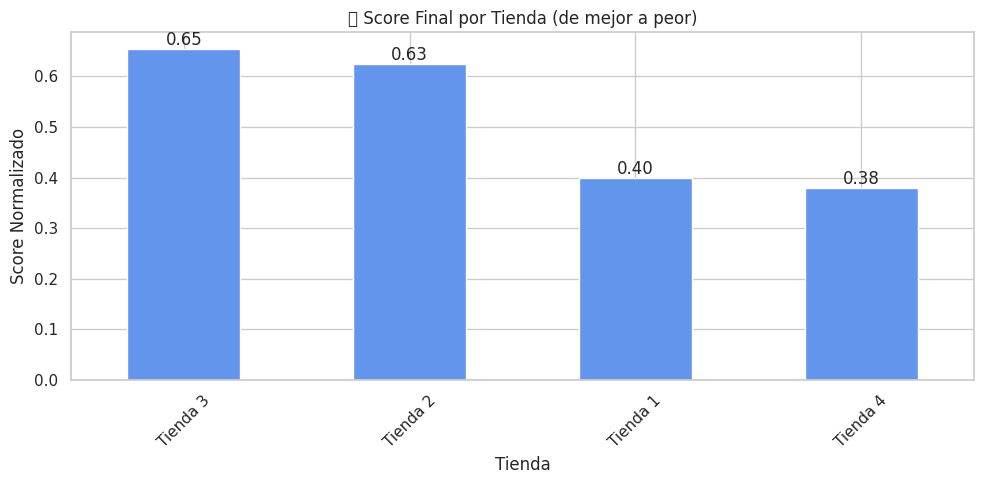

In [24]:
ax = resumen_norm['Score'].sort_values(ascending=False).plot(
    kind='bar', figsize=(10, 5), color='cornflowerblue'
)
plt.title('📈 Score Final por Tienda (de mejor a peor)')
plt.ylabel('Score Normalizado')
plt.xlabel('Tienda')
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.tight_layout()
plt.show()


In [25]:
resumen = pd.DataFrame({
    'Facturación Total': df.groupby('Tienda')['Valor Final'].sum(),
    'Calificación Promedio': df.groupby('Tienda')['Calificación'].mean(),
    'Costo Envío Promedio': df.groupby('Tienda')['Costo de envío'].mean()
})

# Normalizamos los valores para estar en la misma escala (0 a 1)
resumen_norm = (resumen - resumen.min()) / (resumen.max() - resumen.min())

# Calculamos un puntaje combinando los 3 indicadores
resumen_norm['Score'] = (
    resumen_norm['Facturación Total'] * 0.4 +
    resumen_norm['Calificación Promedio'] * 0.3 +
    (1 - resumen_norm['Costo Envío Promedio']) * 0.3  # menor costo es mejor
)

# Ordenamos por el puntaje más bajo
peor_tienda = resumen_norm.sort_values('Score').head(1)
print("La tienda menos recomendable para vender es:")
print(peor_tienda)


La tienda menos recomendable para vender es:
          Facturación Total  Calificación Promedio  Costo Envío Promedio  \
Tienda                                                                     
Tienda 4                0.0               0.266247                   0.0   

             Score  
Tienda              
Tienda 4  0.379874  


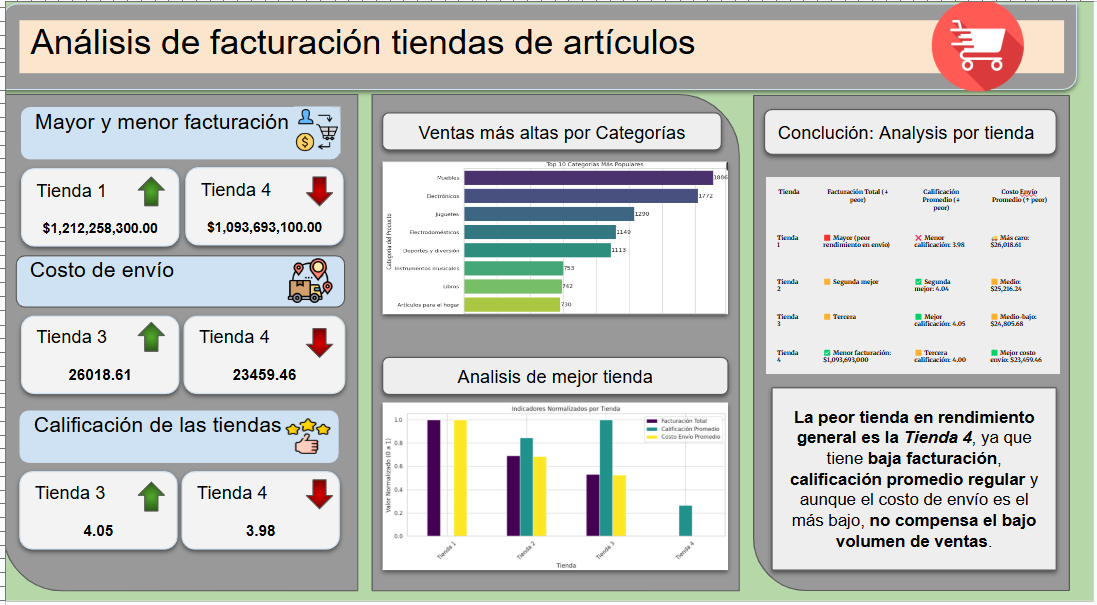